# Exploratory data analysis & visualization
---
This notebook covers the exploration of our data to gather relevant insights

## Importing all the necessary libraries

In [365]:
# Basic Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud

## Importing cleaned dataset

In [366]:
# Load data back for EDA
anime_review = pd.read_csv("anime_review_clean.csv")
anime_info_2020 = pd.read_csv("anime_2020_clean.csv")

In [367]:
print(anime_review.head())

           profile  anime_uid  score  \
0   DesolatePsyche      34096      8   
1        baekbeans      34599     10   
2             skrn      28891      7   
3     edgewalker00       2904      9   
4  aManOfCulture99       4181     10   

                                              scores  
0  {'Overall': '8', 'Story': '8', 'Animation': '8...  
1  {'Overall': '10', 'Story': '10', 'Animation': ...  
2  {'Overall': '7', 'Story': '7', 'Animation': '9...  
3  {'Overall': '9', 'Story': '9', 'Animation': '9...  
4  {'Overall': '10', 'Story': '10', 'Animation': ...  


In [368]:
print(anime_info_2020.head())

   uid                            title  \
0    1                     Cowboy Bebop   
1    5  Cowboy Bebop: Tengoku no Tobira   
2    6                           Trigun   
3    7               Witch Hunter Robin   
4    8                   Bouken Ou Beet   

                                            synopsis  \
0  In the year 2071, humanity has colonized sever...   
1  Another day, another bounty—such is the life o...   
2  Vash the Stampede is the man with a $$60,000,0...   
3  Witches are individuals with special powers li...   
4  It is the dark century and the people are suff...   

                                               genre  \
0  ['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...   
1  ['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']   
2  ['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...   
3  ['Action', 'Magic', 'Police', 'Supernatural', ...   
4  ['Adventure', 'Fantasy', 'Shounen', 'Supernatu...   

                          aired  episodes  members  popularity  sco

## Wordcloud of genres 

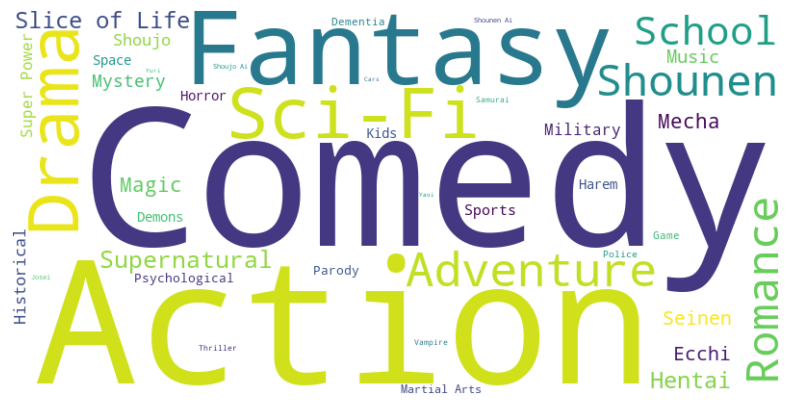

In [369]:
# Initialize an empty list to store all genres
all_genres = []

# Iterate over each row in the DataFrame
for genres_str in anime_info_2020['genre']:
    # Convert the string representation of genres into a list
    genres_list = eval(genres_str)
    # Extend the list of genres
    all_genres.extend(genres_list)

# Generate word cloud with frequency information
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pd.Series(all_genres).value_counts())

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bar plot of top 10 common genres

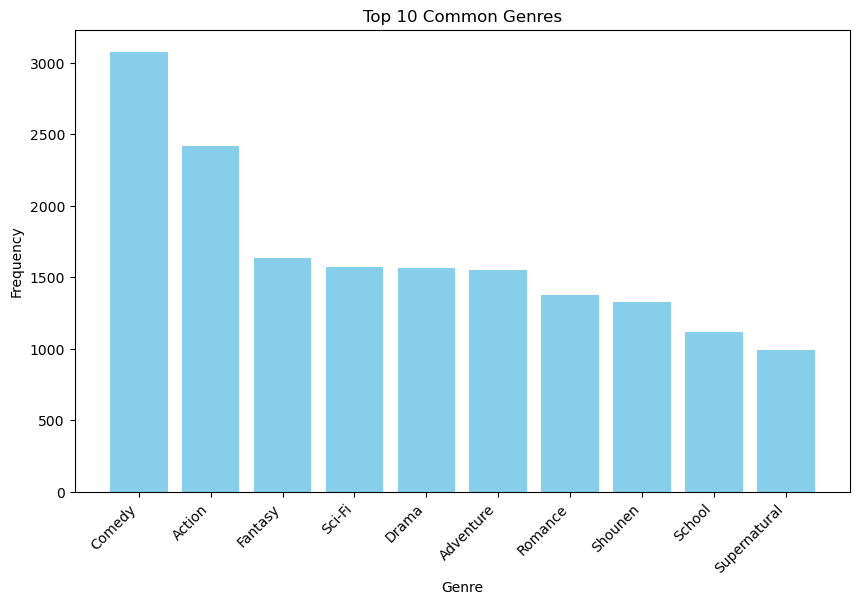

In [370]:
# Initialize an empty list to store all genres
all_genres = []

# Iterate over each row in the DataFrame
for genres_str in anime_info_2020['genre']:
    # Convert the string representation of genres into a list
    genres_list = eval(genres_str)
    # Extend the list of genres
    all_genres.extend(genres_list)
    
# Count the occurrences of each genre
genre_counts = {}
for genre in all_genres:
    if genre in genre_counts:
        genre_counts[genre] += 1
    else:
        genre_counts[genre] = 1

# Sort the genre counts by frequency and select the top 10
top_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_genre_names = [genre[0] for genre in top_genres]
top_genre_counts = [genre[1] for genre in top_genres]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_genre_names, top_genre_counts, color='skyblue')
plt.title('Top 10 Common Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


From this bar plot and the word cloud above, we can see which genres are more basic and common amongst anime watchers which could help them discover new anime genres that they may enjoy, which would be useful for those that are just starting and does not already have any preferences as it is good to go with the basics.

## Score distribution for each anime (scores given by MAL)

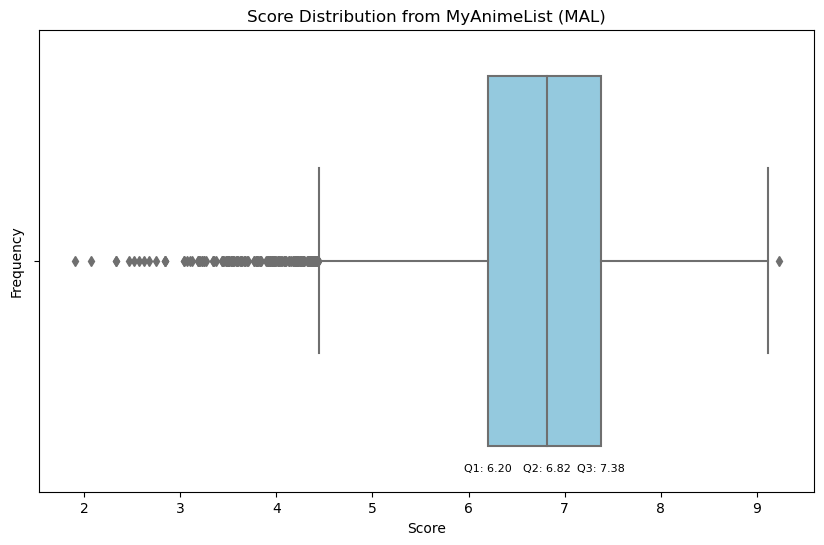

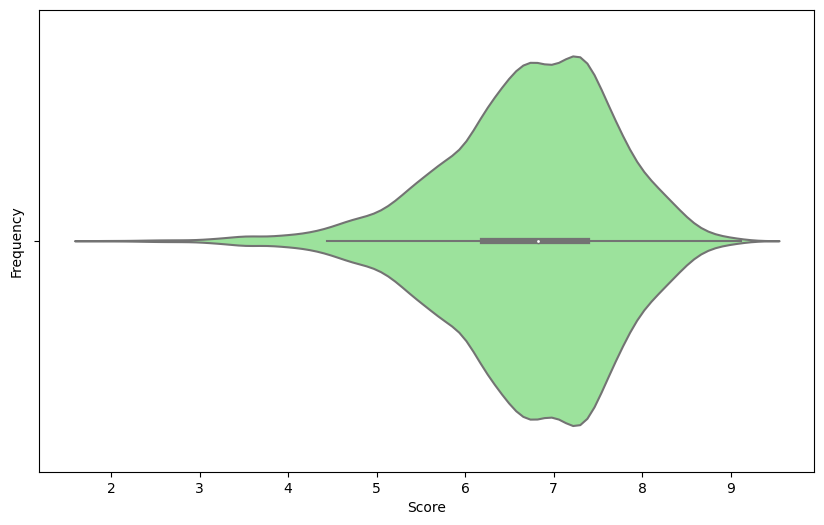

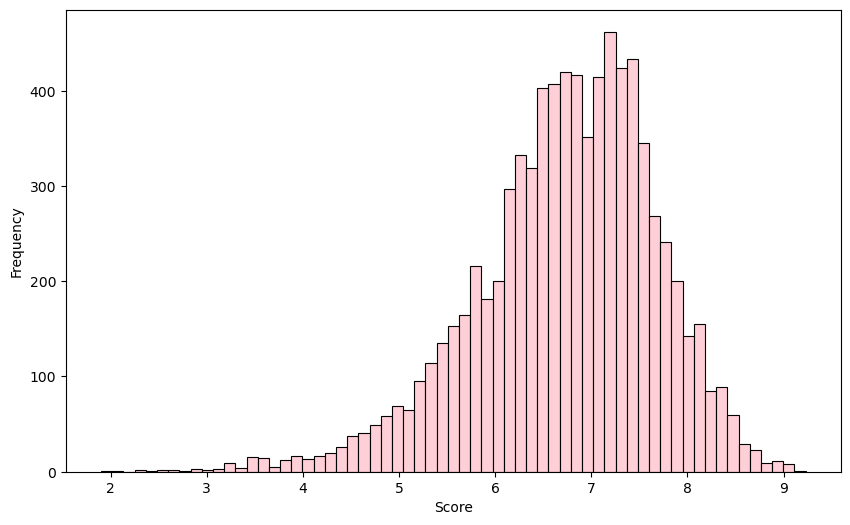

In [381]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot using Seaborn
sns.boxplot(x=anime_info_2020['score'], color='skyblue')

# Add a title and labels to the plot
plt.title('Score Distribution from MyAnimeList (MAL)')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Add quartile annotations
q1 = anime_info_2020['score'].quantile(0.25)
q2 = anime_info_2020['score'].quantile(0.50)
q3 = anime_info_2020['score'].quantile(0.75)

plt.text(q1, 0.45, 'Q1: {:.2f}'.format(q1), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)
plt.text(q2, 0.45, 'Q2: {:.2f}'.format(q2), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)
plt.text(q3, 0.45, 'Q3: {:.2f}'.format(q3), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)

# Display the plot
plt.show()


# Set the figure size for violin plot
plt.figure(figsize=(10, 6))

# Create a violin plot using Seaborn
sns.violinplot(x=anime_info_2020['score'], color='lightgreen')

# Add a title and labels to the plot
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


# Set the figure size for histogram
plt.figure(figsize=(10, 6))

# Create a histogram plot using Seaborn
sns.histplot(anime_info_2020['score'], color='pink', kde=False)

# Add a title and labels to the plot
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


By looking at the 3 diagrams, we now know that the median score from MAL is at 6.82. Therefore, when recommending any anime to the viewers, we can use this as a rough gauge to ensure that the ones we recommend have a good score in comparison to all the animes in the dataset since there also is a relatively high frequency for low scores below the first quartile as compared to high scores above the third quartile. 


## Score distribution for each anime (scores given by mean user ratings)

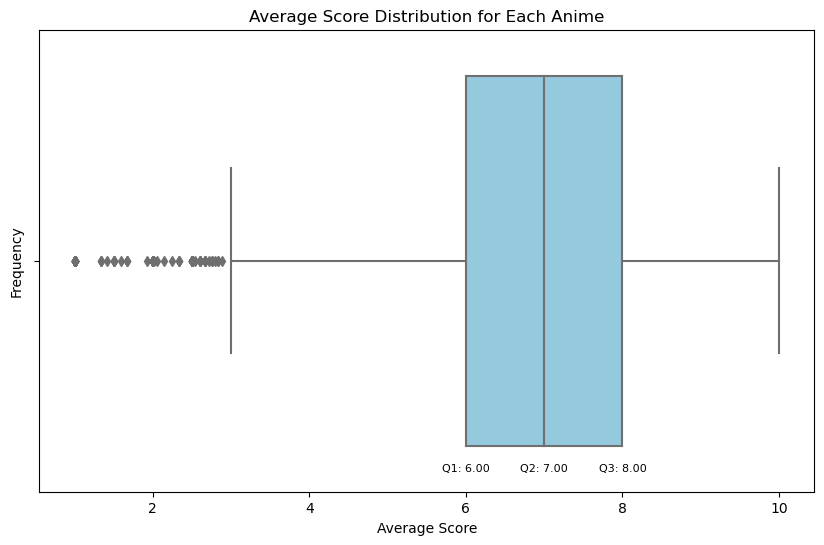

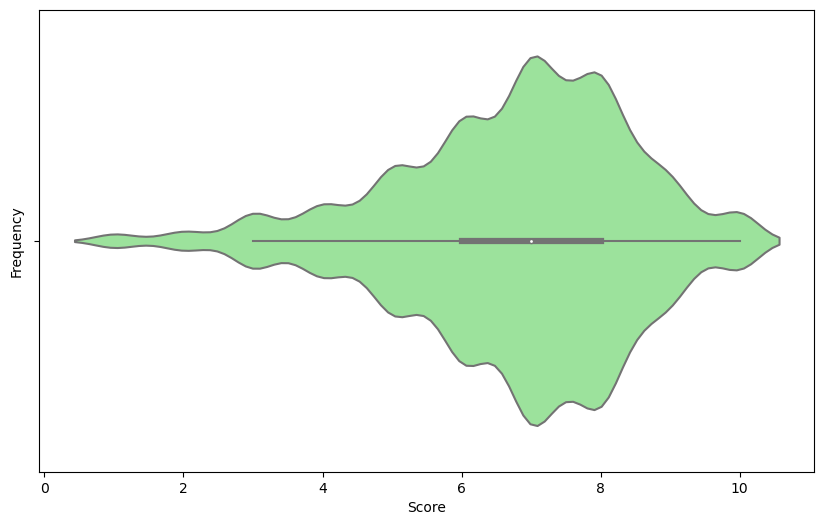

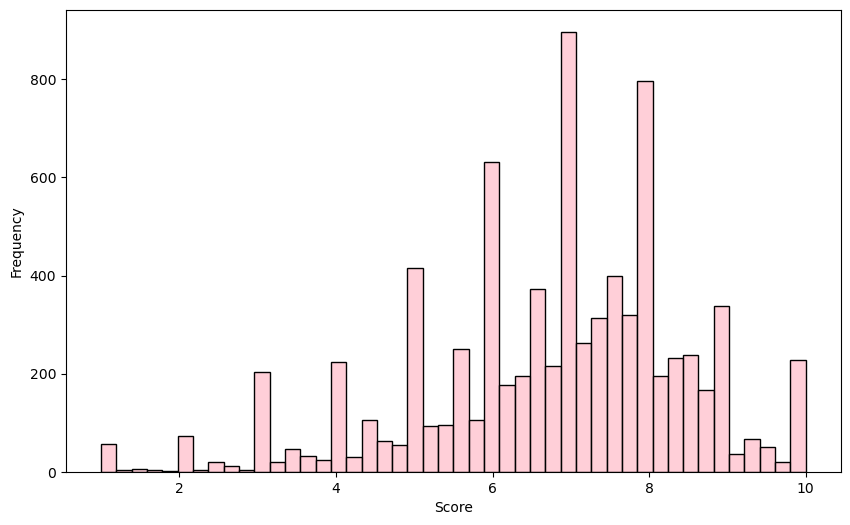

In [382]:
# Group by 'uid' and calculate the mean score for each anime
average_scores = anime_review.groupby('anime_uid')['score'].mean().astype(float)

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=average_scores, color='skyblue')

# Add title and labels
plt.title('Average Score Distribution for Each Anime')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Calculate quartiles
q1 = average_scores.quantile(0.25)
q2 = average_scores.quantile(0.50)
q3 = average_scores.quantile(0.75)

# Add quartile annotations
plt.text(q1, 0.45, 'Q1: {:.2f}'.format(q1), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)
plt.text(q2, 0.45, 'Q2: {:.2f}'.format(q2), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)
plt.text(q3, 0.45, 'Q3: {:.2f}'.format(q3), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)

# Show the plot
plt.show()


# Set the figure size for violin plot
plt.figure(figsize=(10, 6))

# Create a violin plot using Seaborn
sns.violinplot(x=average_scores, color='lightgreen')

# Add a title and labels to the plot
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


# Set the figure size for histogram
plt.figure(figsize=(10, 6))

# Create a histogram plot using Seaborn
sns.histplot(average_scores, color='pink', kde=False)

# Add a title and labels to the plot
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

These 3 plots show the distribution amongst the average rating scores of each anime. Even though it is similar to the one above, it is a little different as it is more centered based on users ratings instead of the score given by MAL. Thus when giving a recommendation for user based filtering where we take into account the users ratings, this would be better to gauge what ratings a recommendation should have. Since it shows a median of 7.00, we can ensure that the recommendations we give have at least an average of 7.00 for it to be more effective.

## Top 10 genres based on MAL scores

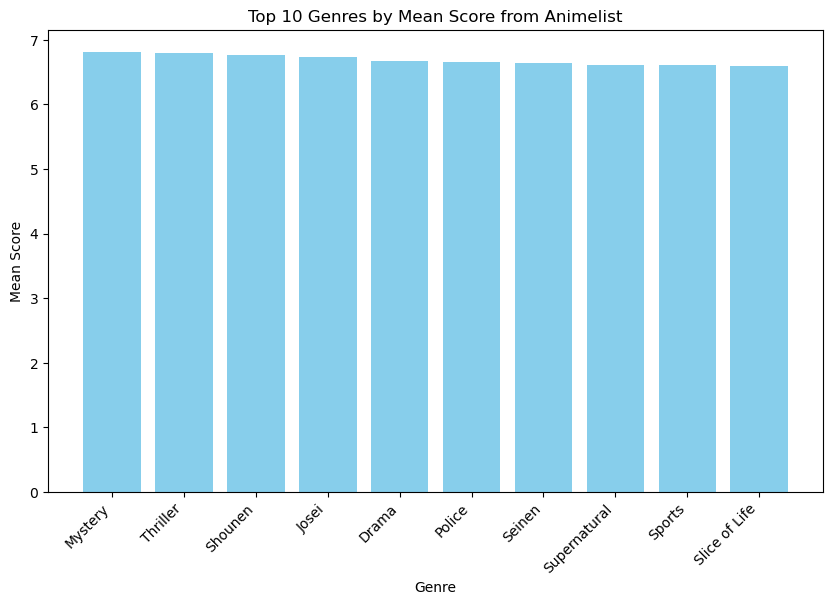

In [373]:
# Initialize a list to store the list of genres with corresponding scores
genres_with_scores = []

# Iterate over each row in the DataFrame
for index, row in anime_info_2020.iterrows():
    # Convert the string representation of genres into a list
    genres = row['genre'].split(', ')
    score = int(row['score'])  
    # Append the list of genres with the corresponding score as a tuple to the list
    genres_with_scores.append((genres, score))
    
# print(genres_with_scores)

# Initialize dictionaries to store scores and counts for each genre
genre_scores = {}
genre_counts = {}

# Iterate over each entry in the list of lists
for genres_list, score in genres_with_scores:
    # Convert the string representation of genres into a list
    genres = eval(','.join(genres_list))
    # Iterate over each genre in the current entry
    for genre in genres:
        # Add the score to the genre's total score
        if genre in genre_scores:
            genre_scores[genre] += score
            genre_counts[genre] += 1
        else:
            genre_scores[genre] = score
            genre_counts[genre] = 1

# Calculate the mean score for each genre
mean_scores = {genre: genre_scores[genre] / genre_counts[genre] for genre in genre_scores}

#print(mean_scores)

# Sort the mean scores by value and select the top 10
top_genres = sorted(mean_scores.items(), key=lambda x: x[1], reverse=True)[:10]
top_genre_names = [genre[0] for genre in top_genres]
top_genre_scores = [genre[1] for genre in top_genres]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_genre_names, top_genre_scores, color='skyblue')
plt.title('Top 10 Genres by Mean Score from Animelist')
plt.xlabel('Genre')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')
plt.show()

This bar plot shows the mean scores given by MAL for the top 10 genres does not differ by much, which goes to show that genre does not affect how good an anime is and all genres has its own good or bad shows, so when giving recommendations to someone with no genre preferences (especially new users with no experience of watching animes), we do not need to filter any of the genres out as they are all suitable for being recommended.

## Correlation matrix 

<Axes: >

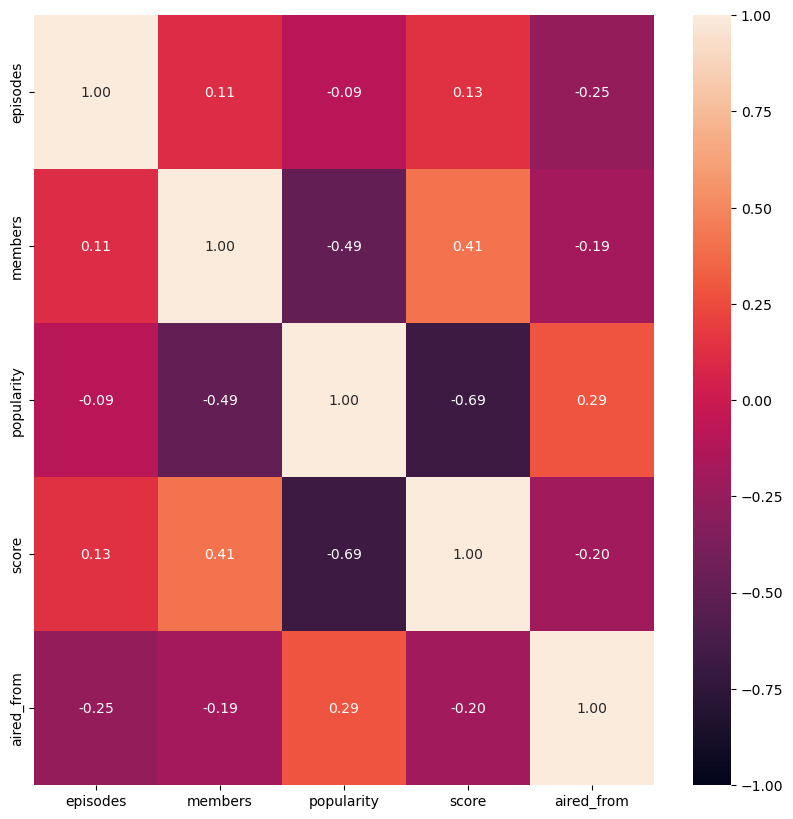

In [380]:
anime_info_correlation = anime_info_2020.drop(columns=['title','synopsis','genre','aired','uid', 'aired_year'])
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10,10))
sb.heatmap(anime_info_correlation.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

From this Correlation Matrix, we can tell that they are not strongly related to each other. This is especially seen when the number of episodes is being compared to the rest, which shows that the number of episodes generally does not impact the other variables. What was surprising is that there is a negative correlation between the popularity and the number of members that added the anime into their list and between the popularity and the score. This shows that just because an anime was deemed popular by myanimelist, it does not mean that it has a good score or a lot of people watching.

## Pairplot for numerical variables

C:\Users\Mayukhi Nimesha\AppData\Local\Temp\ipykernel_17536\3091351923.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  anime_info_2020['aired_from'] = pd.to_datetime(anime_info_2020['aired'], errors='coerce')
C:\Users\Mayukhi Nimesha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


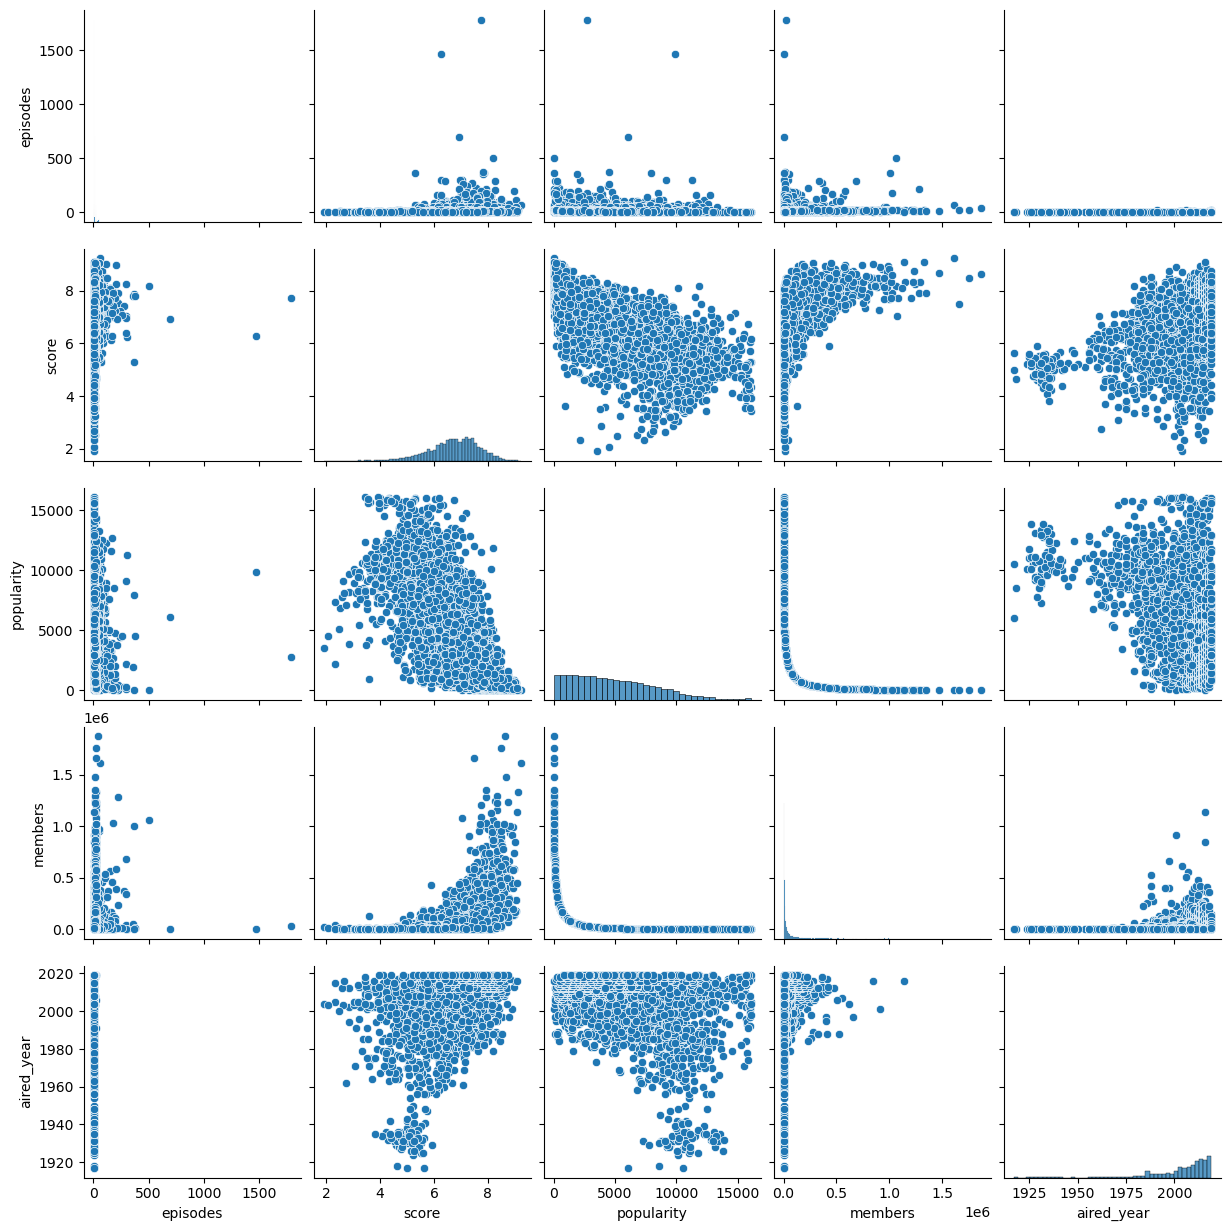

In [374]:
# Parse the airing dates to extract the years
anime_info_2020['aired_from'] = pd.to_datetime(anime_info_2020['aired'], errors='coerce')
anime_info_2020['aired_year'] = anime_info_2020['aired_from'].dt.year

# Select relevant numerical variables for the pairplot
selected_variables = ['episodes', 'score', 'popularity', 'members', 'aired_year']

# Create the pairplot
sns.pairplot(anime_info_2020[selected_variables])
plt.show()

With this pairplot, it showcases similar information as the correlation matrix. However it has a difference where we are now able to visualise the relationship between all the numerical variables in our anime_info_2020 data and can see how they affect one another, instead of just having the numerical value of the correlation.

## Top 10 anime based on rating count 

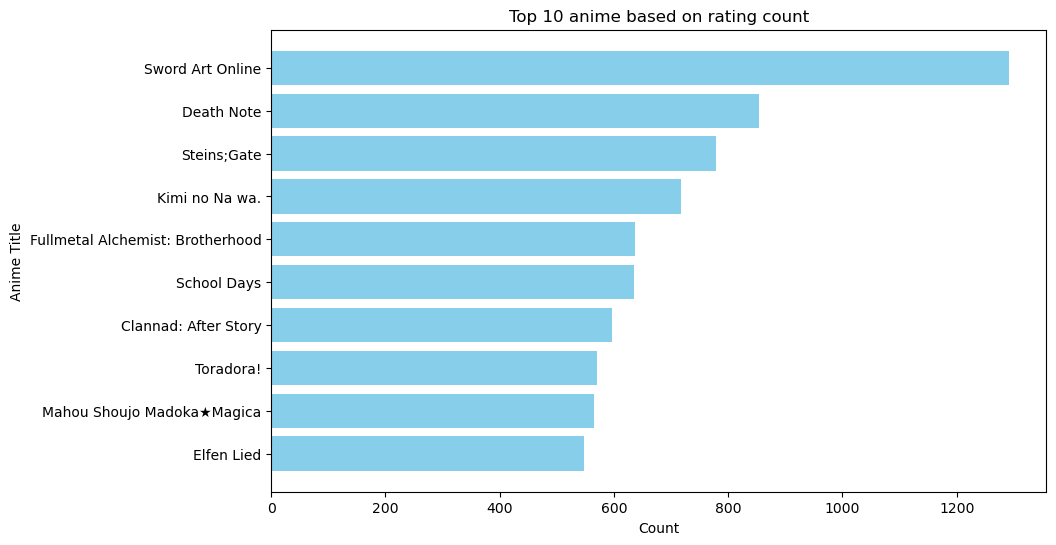

In [377]:
# Count the occurrences of each unique anime_uid and select the top 10
top_10_anime_uid = anime_review['anime_uid'].value_counts().head(10)

# Get the corresponding titles for the top 10 anime_uid values
top_10_titles = anime_info_2020.loc[anime_info_2020['uid'].isin(top_10_anime_uid.index), ['uid', 'title']]

# Merge the titles with the top 10 anime_uid values from anime_review
top_10_titles_with_uid = top_10_titles.merge(top_10_anime_uid, left_on='uid', right_index=True)

# Sort merged data by count in ascending order
merged_data_sorted = top_10_titles_with_uid.sort_values(by='count', ascending=True)

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(merged_data_sorted['title'], merged_data_sorted['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Anime Title')
plt.title('Top 10 anime based on rating count')
plt.show()


This bar plot shows the top 10 animes based on the number of ratings it got from users, which shows that these animes are very popular amongst users and would be good for recommendation. This would be especially good for new users as a gauge on which animes they could start watching as this would also expose them to a range of different genres since the top 10 animes are not filtered by genre. Thus, allowing them to better understand what genres suit them so they can keep in mind when looking for new animes to watch next time.

## Relationship between mean user ratings and aired year

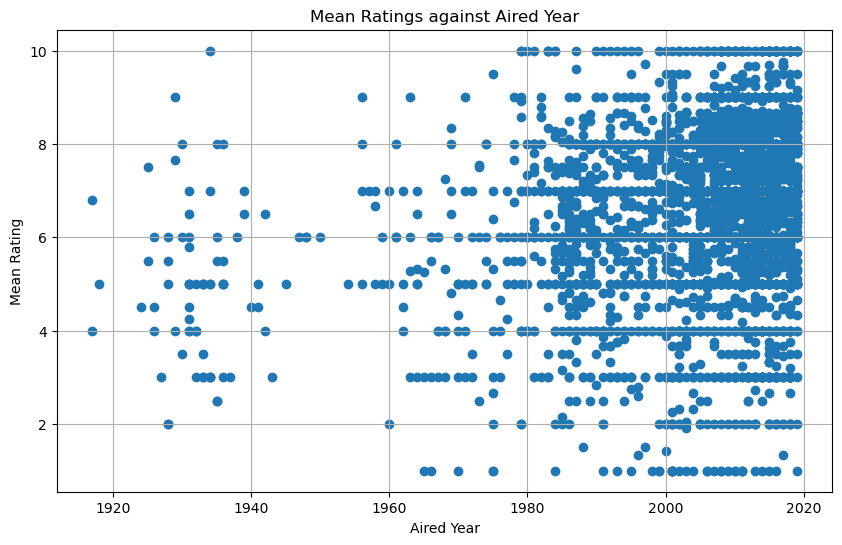

Correlation between airing year and mean rating: 0.19692655768850129


In [378]:
# Step 1: Calculate mean ratings for each anime
mean_ratings = anime_review.groupby('anime_uid')['score'].mean().reset_index()

# Step 2: Merge mean ratings with anime_info_2020 based on UID
merged_data = pd.merge(anime_info_2020, mean_ratings, left_on='uid', right_on='anime_uid', how='inner')

# Step 3: Plot scatter plot of aired years against mean ratings
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['aired_year'], mean_ratings['score'])
plt.title('Mean Ratings against Aired Year')
plt.xlabel('Aired Year')
plt.ylabel('Mean Rating')
plt.grid(True)
plt.show()

# Compute the Pearson correlation coefficient
correlation = mean_ratings['score'].corr(merged_data['aired_year'])

print("Correlation between airing year and mean rating:", correlation)

This scatter plot shows the relationship between the mean user ratings and the year the anime was aired. It shows that most anime was aired later on in the 2000s, which could be due to the rising popularity in anime, and that it has a poor correlation with the mean ratings given, with a correlation of 0.197. This goes to show that despite newer series coming up, users do not necessarily like it more or less. From this we can tell that when the anime was aired does not need to be considered when giving a recommendation. However, this might also not be very accurate as the data from the earlier years are significantly lesser than the newer ones, which can be seen by how there is a larger cluster from year 2000 onwards.